In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (10,10)
plt.rcParams['figure.dpi']= 500
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Iris.csv', index_col=0)

In [3]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [4]:
target = df['Species']
features = df.iloc[:,:-1]

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(features,target, test_size=0.2, random_state=1)

In [6]:
decisiontree = DecisionTreeClassifier(criterion='entropy')

In [7]:
decisiontree.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy')

In [8]:
prediction = decisiontree.predict(xtest)
prediction

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
pd.DataFrame(prediction)

,0
0,Iris-setosa
1,Iris-versicolor
2,Iris-versicolor
3,Iris-setosa
4,Iris-virginica
5,Iris-versicolor
6,Iris-virginica
7,Iris-setosa
8,Iris-setosa
9,Iris-virginica


In [10]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
print(classification_report(ytest,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [12]:
confusion_matrix(ytest, prediction)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [13]:
# score gives Accuracy
print('Trainging Acc', decisiontree.score(xtrain, ytrain))
print('Trainging Acc', decisiontree.score(xtest, ytest))

Trainging Acc 1.0
Trainging Acc 0.9666666666666667


- Overfitting: Large gap between training accuracy and testing accuracy. (100% - 90%)
- Underfitting: Low values for both training and testing accuracy.
- Generalization: High and close values for both training and testing accuracy. Maximum 3% difference between training accuracy and testing accuracy(100% - 97%)

In [14]:
features.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [15]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

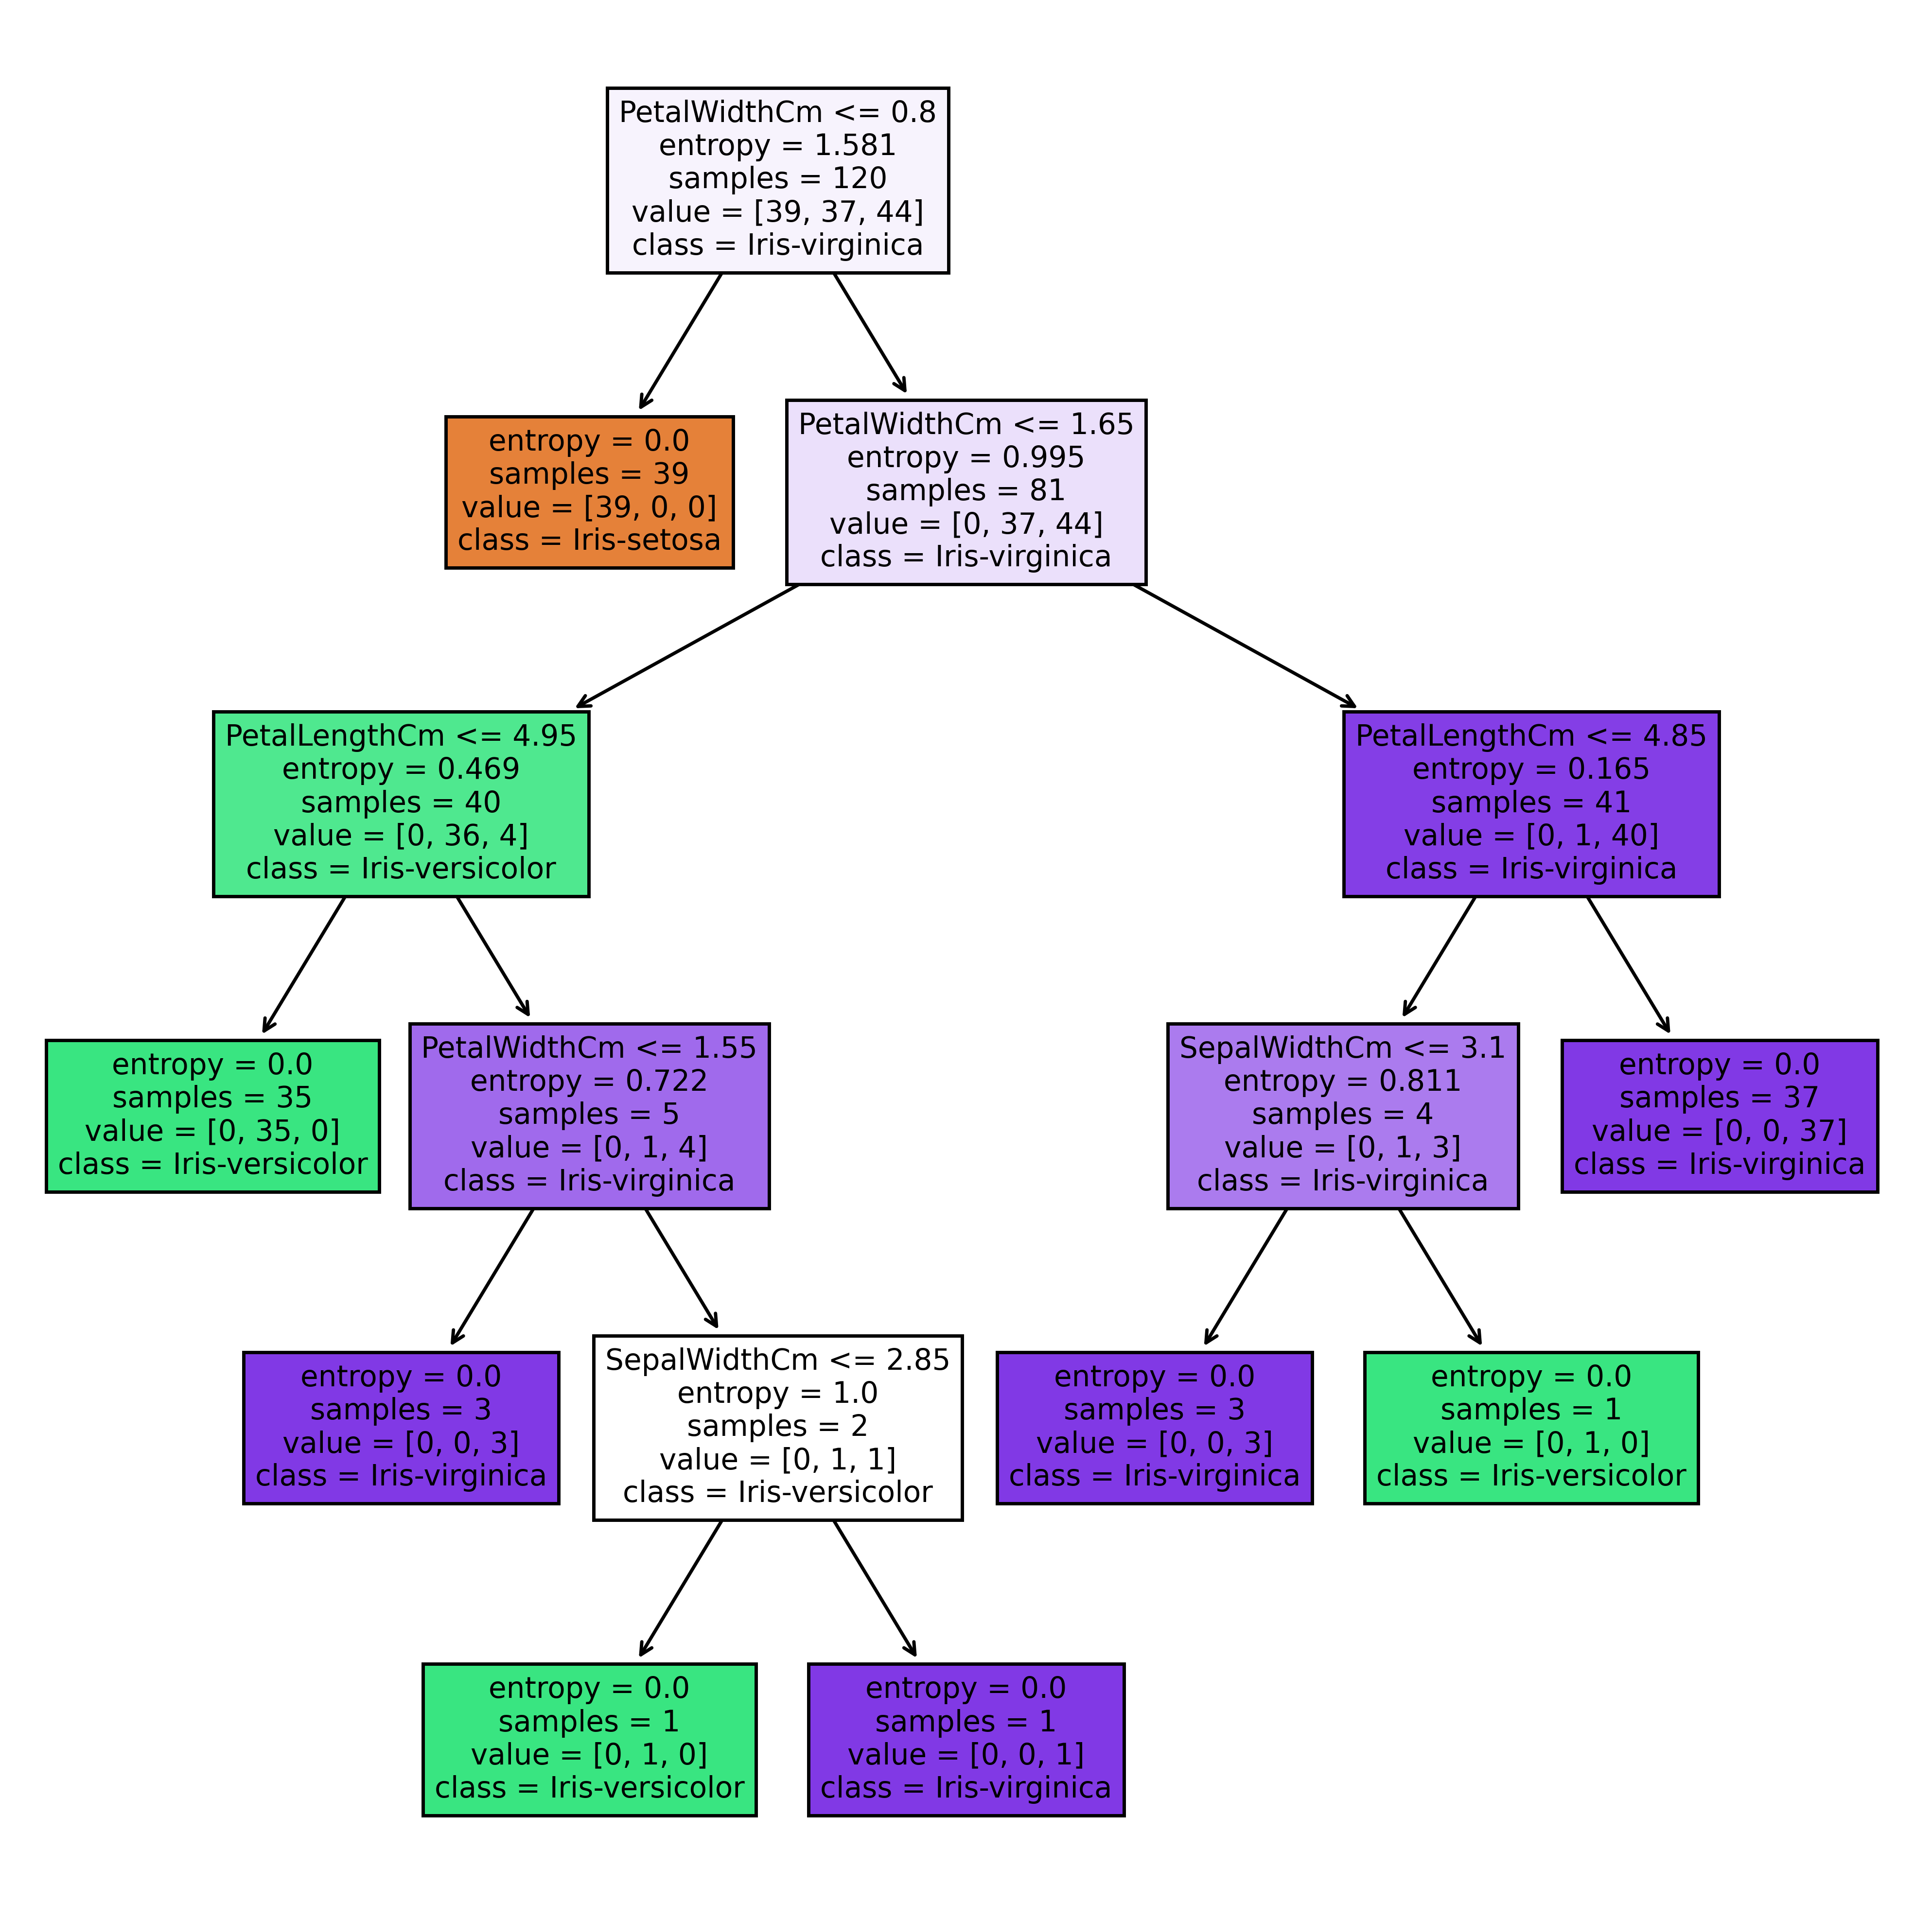

In [16]:
tree.plot_tree(decisiontree, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 
               class_names= ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
              filled=True)
plt.show()

In [17]:
decisiontree.feature_importances_

array([0.        , 0.02764493, 0.09849491, 0.87386016])

In [18]:
features.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')